In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import itertools
from sklearn.datasets import make_blobs
from sklearn.metrics import v_measure_score
import time
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [4]:
import pickle

## Algorytm MiniBatch KMeans

Parametry:

k - liczba klastrów

b - rozmiar batcha

X - zbiór danych


Inicjujemy środki klastrów c ∈ C jako losowe elementy z X

v ← 0  // wektor liczności klastrów

for i = 1 to t do:   // t iteracji - 

      M ← batch - losowy podzbiór danych wielkości b

      for x ∈ M do:                   // dla każdego elementu x z batcha
            d[x] ← f (C, x)           // przyporządkuj do x najbliższy klaster
      end for
      
      for x ∈ M do:
            c ← d[x]                  // weź środek klastra odpowiadający x
            v[c] ← v[c] + 1           // zaktualizuj liczbę elementów w klastrze c
            η ← 1 / v[c]              // oblicz tzw. learning rate
            c ← (1 − η)c + ηx         // zaktualizuj środek (c to wektor)
      end for
end for

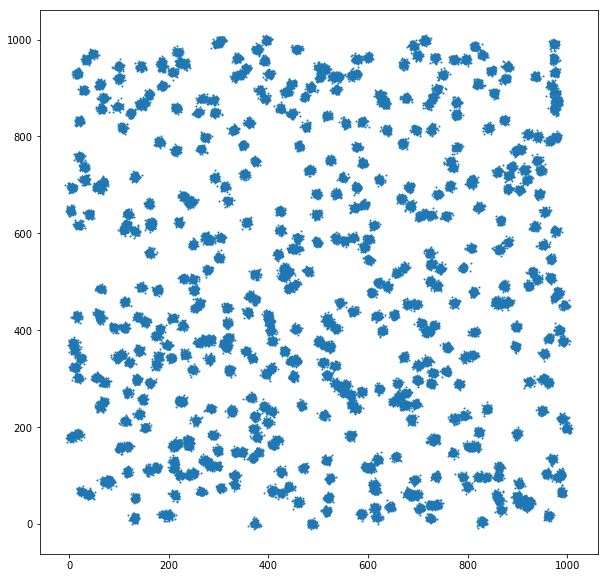

In [42]:
N_CLUSTERS = 500

data, labels_true = make_blobs(100000, centers=N_CLUSTERS,cluster_std=4,center_box=[0,1000],random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

In [29]:
mini_knn = MiniBatchKMeans(n_clusters=500,init_size=1500,batch_size=1000,max_iter=500)
mini_knn.fit(data)

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1500, max_iter=500, max_no_improvement=10,
        n_clusters=500, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

In [25]:
mini_labels = mini_knn.predict(data)

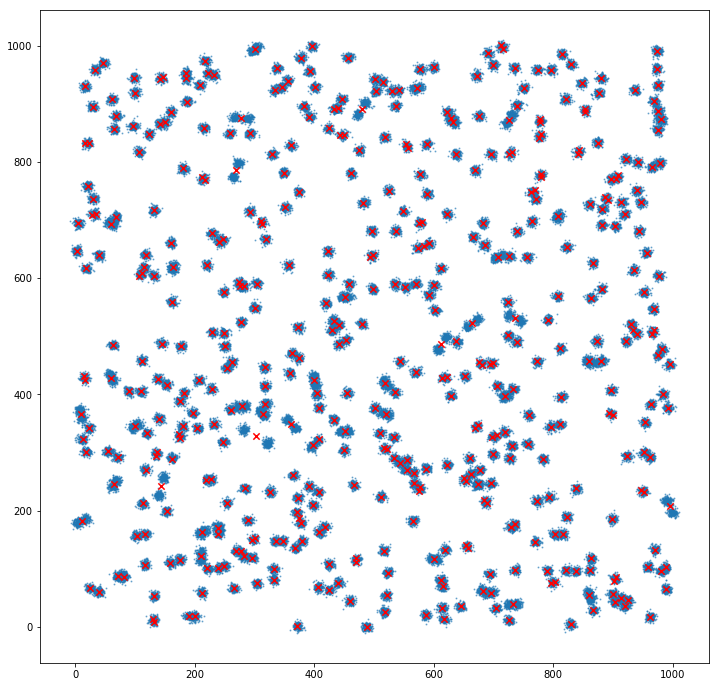

In [23]:
plt.figure(figsize=(12,12))
plt.scatter(data[:,0],data[:,1],s=1,alpha=0.5)
plt.scatter(mini_knn.cluster_centers_[:,0],mini_knn.cluster_centers_[:,1],s=40,c='red',marker='x')
plt.show()

In [27]:
mini_v = v_measure_score(mini_labels,labels)
mini_v

0.97040818953601171

### Comparison of MiniBatchKMeans / Birch + KMeans / Birch + Hierachical clustering

In [35]:
mini_knn = MiniBatchKMeans(n_clusters=500,init_size=1500,batch_size=1000,max_iter=500)
bnn_knn = Birch(threshold=10,n_clusters=KMeans(n_clusters=500))
bnn_hier = Birch(threshold=10,n_clusters=AgglomerativeClustering(n_clusters=500))

In [43]:
models = [
    ('mini_batch_kmeans',mini_knn),
    ('birch_kmeans',bnn_knn),
    ('birch_hierarchical',bnn_hier)]

In [49]:
results = []

for name,model in models:
    print(name)
    
    start = time.time()

    model.fit(data)
    model_labels = model.predict(data)
    
    end = time.time()
    
    results_dict = {
        'name':name,
        'time':end-start,
        'v_score':v_measure_score(labels_pred=model_labels,labels_true=labels_true)
    }
    
    results.append(results_dict)
    
    print('V score {}'.format(v_measure_score(labels_pred=model_labels,labels_true=labels_true)))
    print(end - start)

mini_batch_kmeans
V score 0.9693229565364353
6.324816942214966
birch_kmeans
V score 0.9704167892058528
9.12533164024353
birch_hierarchical
V score 0.9704153701458148
6.873892307281494


In [50]:
results

[{'name': 'mini_batch_kmeans',
  'time': 6.324816942214966,
  'v_score': 0.9693229565364353},
 {'name': 'birch_kmeans',
  'time': 9.12533164024353,
  'v_score': 0.97041678920585284},
 {'name': 'birch_hierarchical',
  'time': 6.873892307281494,
  'v_score': 0.9704153701458148}]

In [51]:
pd.DataFrame(results)

,name,time,v_score
0,mini_batch_kmeans,6.324817,0.969323
1,birch_kmeans,9.125332,0.970417
2,birch_hierarchical,6.873892,0.970415


### Saving models

In [53]:
labels_pre_dump = mini_knn.predict(data)

In [54]:
file = open('./my_model.p','wb')#rb

In [55]:
pickle.dump(mini_knn,file)

In [56]:
file.close()

In [57]:
with open('./my_model.p','rb') as f:
    loaded_model = pickle.load(f)

In [58]:
label_post_dump = loaded_model.predict(data)

In [59]:
(labels_pre_dump == label_post_dump).all()

True